# Defining Geometry

The geometry of the spatial domain will be rectangular with an x-dimension length of $L_x$ metres and a y-dimension length of $L_y$ metres.

<img src="./Paper_Images/mesh_geometry.png" alt="Drawing" style="width: 600px;"/>


In [2]:
# Assigning example values to these parameters:

Lx = 1  # Width of domain
Ly = 1  # Height of domain

# Defining Mesh


This spatial domain is divided into rectangular computational cells with x-dimensions of $dx$ metres y-dimensions of $dy$ metres. 

The number of cells in the x-direction = $n_x$

The number of cells in the y-direction = $n_y$



<img src="./Paper_Images/Mesh.jpg" alt="Drawing" style="width: 600px;"/>


<!-- This solver will be for a structured mesh. The size of the cells within the mesh will remain constant with time.  -->

In [3]:
nx = 4  # Number of cells in the x-direction
ny = 4  # Number of cells in the y-direction

dy = Ly/ny  # Length of each control volume in the y-direction
dx = Lx/nx  # Length of each control volume in the x-direction


# Indexing Convention

Next we'll determine an indexing convention that will assign an ID number to each cell centre and boundary face, these will be referred to as nodes within the mesh.

<img src="./Paper_Images/MeshWithPoints.jpg" alt="Drawing" style="width: 600px;"/>


The following function visualises the mesh and the node IDs. Feel free to play around with Lx, Ly, nx and ny values:


/home/scottlevie/newPythonSolver/python_fv_csm/seperate_notebooks/Background_Functions.ipynb:350: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  "        \n",


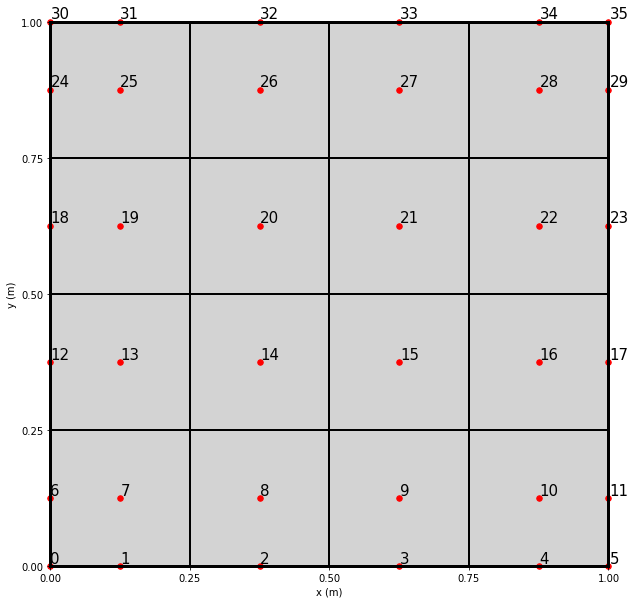

In [4]:
from ipynb.fs.full.Background_Functions import visualise_mesh

visualise_mesh(Lx, Ly, nx, ny)

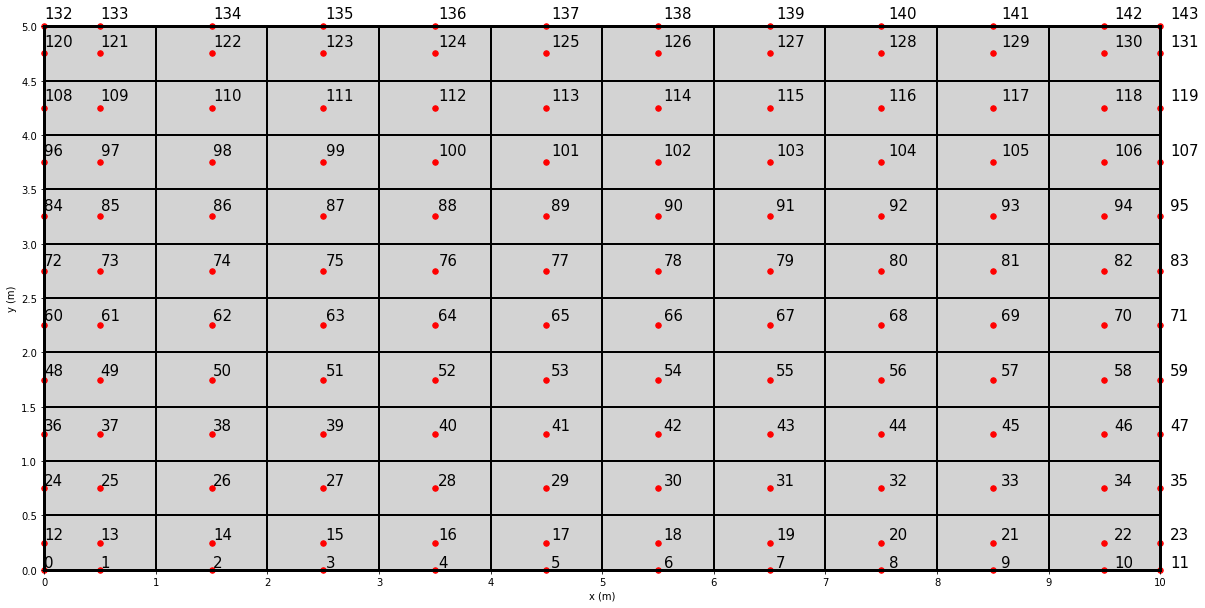

In [4]:
# Example with different values
Lx, Ly, nx, ny = 10, 5, 10, 10

visualise_mesh(Lx, Ly, nx, ny)

# Displacement Fields


Each node on the above mesh is a point in the displacement field $\boldsymbol{u} (x,y)$. The $\boldsymbol{u}$ field can be thought as the change in displacement from it's original position, not the distance from the origin. Therefore we can initialise the $\boldsymbol{u}$ field to be equal to zero for all points in all directions.

As our mesh is 2D the $\boldsymbol{u} (x,y)$ (<code>U</code>) field is made up of change of displacement in the x-direction $u$ (<code>u</code>) and in the y-direction $v$ (<code>v</code>).


For clarity when coding, we will refer to:

- <code>U</code> as the displacement field $\boldsymbol{u}$
- <code>u</code> as displacement vector in the x-direction $u$
- <code>v</code> as displacement vector in the y-direction $v$


In [5]:
import numpy as np

# Initialise U field:
def initalise_U_field(nx, ny):

    # Create an zero array for the u and v values for each point
    U = np.zeros([(ny + 2) * (nx + 2), 2])

    return U

U = initalise_U_field(nx, ny)

In [6]:
# The shape of U:
print(U.shape)

# This value is the number of nodes in the mesh
print("Number of nodes in Mesh: " + str(U.shape[0]))

# This is the number of dimension, i.e x & y
print("Number of dimensions: " + str(U.shape[1]))

(144, 2)
Number of nodes in Mesh: 144
Number of dimensions: 2


*For clarity going forward*:

**Points** within the mesh refer the the cell centres. These do not include the face centres on the boundaries.

**Nodes** within the mesh refer the the combination of cell centres (points) and face centres on the boundaries.

**Vertexes** within the mesh refer to the corner points between cells.

### Note on changing displacement (Re-worded/ wrong location):

This solver will be used to solve for a displacement field of a solution due to conditions external conditions. One assumption for this solver is that the new displacement field has little effect on the size and orientation of the cells within the mesh, i.e., even though we are solving for new displacements, we assume that these displacements are so small that the effect they would have on creating a new mesh geometry are minute. 